# Practical Exercise (2) – Data Preprocessing

### Step 1: Handling Missing Values

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [95]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']

df = pd.read_csv(url, names=columns)
print("Raw Data:")
df.head()
df.info()

Raw Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [96]:
df.replace('?', np.nan, inplace=True)
for col in df.columns:
    df[col] = pd.to_numeric(df[col])
print(f"Missing Values before: \n")
print(df.isnull().sum())

Missing Values before: 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [97]:
num_cols = df.select_dtypes(include=['float64','int64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)
print(f"Missing Values now: \n")
print(df.isnull().sum())

Missing Values now: 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


***As the missing values are Numerical feature, Median has been used to replace the missing values, as it would be better than average when you have weird outliers.***

### Step 2: Noise Detection and Handling

In [64]:
np.random.seed(42)
df['chol_noisy'] = df['chol'] + np.random.normal(0, 10, size=len(df))

In [65]:
df['chol_smoothed'] = df['chol_noisy'].rolling(window=5, min_periods=1).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

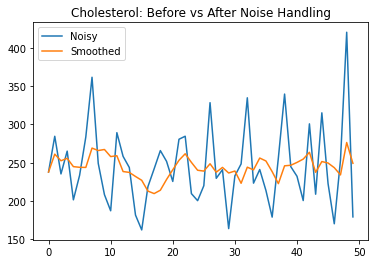

In [66]:
plt.figure()
plt.plot(df['chol_noisy'][:50], label='Noisy')
plt.plot(df['chol_smoothed'][:50], label='Smoothed')
plt.legend()
plt.title('Cholesterol: Before vs After Noise Handling')
plt.show

***Moving average reduces fluctuations while preserving the overall trend.***

### Step 3: Outlier Detection and Handling

In [102]:
z_scores = np.abs(stats.zscore(df['trestbps']))
outliers = z_scores > 3
print("Number of outliers detected in trestbps:", outliers.sum())
df_no_outliers = df[~outliers]
print("Shape before outlier removal:", df.shape)
print("Shape after outlier removal:", df_no_outliers.shape)

Number of outliers detected in trestbps: 2
Shape before outlier removal: (303, 14)
Shape after outlier removal: (301, 14)


***Z-score Method: <br>
Extreme blood pressure values can distort model learning; removing rare, unrealistic values improves.***

### Step 4: Data Transformation

*One-Hot Encoding cp (Chest Pain Type)*

In [105]:
df_encoded = pd.get_dummies(df_no_outliers, columns=['cp'], drop_first=True)
print("Data after One-Hot Encoding")
(df_encoded.head())

Data after One-Hot Encoding


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


***Converts categorical data into numeric form suitable for machine learning algorithms.***

### Step 5: Feature Scaling

In [69]:
features = ['age', 'chol', 'thalach']

*Standardization (Z-score)*

In [106]:
scaler_standard = StandardScaler()
df_encoded[[f + '_z' for f in features]] = scaler_standard.fit_transform(df_encoded[features])
print(df_encoded[[f + '_z' for f in features]].head())

      age_z    chol_z  thalach_z
0  0.946052 -0.259541   0.021474
1  1.387886  0.764312  -1.825268
2  1.387886 -0.336813  -0.901897
3 -1.925866  0.068864   1.648365
4 -1.484033 -0.819763   0.988814


*Normalization (Min–Max)*

In [107]:
scaler_minmax = MinMaxScaler()
df_encoded[[f + '_mm' for f in features]] = scaler_minmax.fit_transform(df_encoded[features])
print(df_encoded[[f + '_mm' for f in features]].head())

     age_mm   chol_mm  thalach_mm
0  0.708333  0.244292    0.603053
1  0.791667  0.365297    0.282443
2  0.791667  0.235160    0.442748
3  0.166667  0.283105    0.885496
4  0.250000  0.178082    0.770992


***Z-score scaling is preferred when data follows a normal distribution. <br>
Min–Max scaling is preferred when preserving relative ranges is important.***

In [108]:
print("Raw data:")
(df.head())

Raw data:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [110]:
print("Processed data:")
df_encoded.head()

Processed data:


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,...,target,cp_2.0,cp_3.0,cp_4.0,age_z,chol_z,thalach_z,age_mm,chol_mm,thalach_mm
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,...,0,0,0,0,0.946052,-0.259541,0.021474,0.708333,0.244292,0.603053
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,...,2,0,0,1,1.387886,0.764312,-1.825268,0.791667,0.365297,0.282443
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,...,1,0,0,1,1.387886,-0.336813,-0.901897,0.791667,0.235160,0.442748
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,...,0,0,1,0,-1.925866,0.068864,1.648365,0.166667,0.283105,0.885496
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,...,0,1,0,0,-1.484033,-0.819763,0.988814,0.250000,0.178082,0.770992
